### Medical sales predictive model

Loading the libraries and data set!

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Data Analytics Python v1.00.xlsx',sheet_name='Case Study Data',skiprows=1)
data.head()

,Customer ID,Title,Specialty Code,Specialty Description,State,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Brand 2 Sales (Competitor Brand),Total Branded Market Sales,Total Market (Branded + Unbranded) Sales
0,10000,MD,FM,FAMILY MEDICINE,SC,0,0,17,0,0,0,NaN,3.0,131
1,10001,MD,CD,CARDIOVASCULAR DISEASES,SC,0,0,17,0,0,0,NaN,NaN,56
2,10002,MD,IM,INTERNAL MEDICINE,AL,0,0,17,0,0,0,NaN,NaN,161
3,10003,MD,FM,FAMILY MEDICINE,AL,6,0,17,0,0,0,NaN,NaN,180
4,10004,MD,CD,CARDIOVASCULAR DISEASES,AL,2,0,17,0,0,0,NaN,4.0,44


In [3]:
data.columns

Index(['Customer ID', 'Title', 'Specialty Code', 'Specialty Description',
       'State', 'Call Attempts', 'Calls Successfully Completed', 'Emails Sent',
       'Emails Opened', 'Faxes Sent', 'Brand 1 Sales (Company's Brand)',
       'Brand 2 Sales (Competitor Brand)', 'Total Branded Market Sales',
       'Total Market (Branded + Unbranded) Sales'],
      dtype='object')

<b>Readying the predictors and prediction column</b>

In [4]:
X = data.loc[:,['Call Attempts', 'Calls Successfully Completed', 'Emails Sent','Emails Opened', 'Faxes Sent']]

In [5]:
y = data["Brand 1 Sales (Company's Brand)"]

<b>Checking for multicollinearity</b>

In [6]:
data.select_dtypes('int64').corr()

,Customer ID,Call Attempts,Calls Successfully Completed,Emails Sent,Emails Opened,Faxes Sent,Brand 1 Sales (Company's Brand),Total Market (Branded + Unbranded) Sales
Customer ID,1.000000,-0.080403,-0.054775,-0.112495,-0.045933,-0.067266,-0.005672,-0.058239
Call Attempts,-0.080403,1.000000,0.656240,0.050257,0.034028,0.680171,0.112346,0.353824
Calls Successfully Completed,-0.054775,0.656240,1.000000,0.035510,0.024587,0.654767,0.079732,0.263627
Emails Sent,-0.112495,0.050257,0.035510,1.000000,0.162714,0.039348,0.000837,0.031566
Emails Opened,-0.045933,0.034028,0.024587,0.162714,1.000000,0.022884,0.000095,0.004698
Faxes Sent,-0.067266,0.680171,0.654767,0.039348,0.022884,1.000000,0.069151,0.255463
Brand 1 Sales (Company's Brand),-0.005672,0.112346,0.079732,0.000837,0.000095,0.069151,1.000000,0.066628
Total Market (Branded + Unbranded) Sales,-0.058239,0.353824,0.263627,0.031566,0.004698,0.255463,0.066628,1.000000


<b>Missing value analysis:</b>

In [7]:
X.isna().sum()

Call Attempts                   0
Calls Successfully Completed    0
Emails Sent                     0
Emails Opened                   0
Faxes Sent                      0
dtype: int64

In [8]:
y.isna().any()

False

<b>Plotting the data roughly to see its structure:</b>

In [10]:
from sklearn.decomposition import PCA

In 2d:

[51.87975289] 



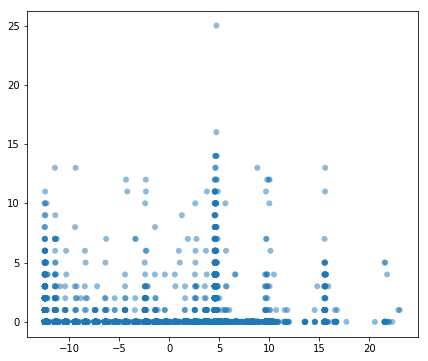

In [13]:
def pca_plot_2d_binaryclass(design_matrix,target):
    
    pca_plot = PCA(n_components=1).fit(design_matrix)
    print(pca_plot.explained_variance_,'\n')
    pcs = pca_plot.transform(design_matrix)

    plt.figure(figsize=(7,6))
    plt.scatter(pcs, y, edgecolor='', alpha=0.5)
    plt.show()
    
pca_plot_2d_binaryclass(X,y)

In 3d:

[51.87975289  4.59043164] 



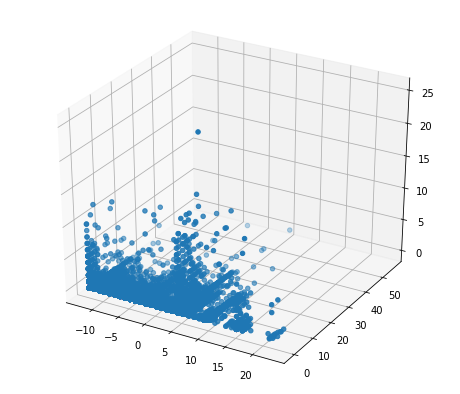

In [15]:
def pca_plot_3d_binaryclass(design_matrix,target):
    
    pca_plot = PCA(n_components=2).fit(design_matrix)
    print(pca_plot.explained_variance_,'\n')
    pcs = pca_plot.transform(design_matrix)

    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111, projection='3d')
    xs = pcs[:,0] 
    ys = pcs[:,1]
    zs = y
    ax.scatter(xs,ys,zs, marker = 'o')
    plt.show()
    
pca_plot_3d_binaryclass(X,y)

<b>Checking the structure of the variables!</b>

Bar graph of : Title


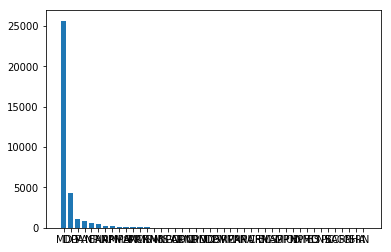

Bar graph of : Specialty Code


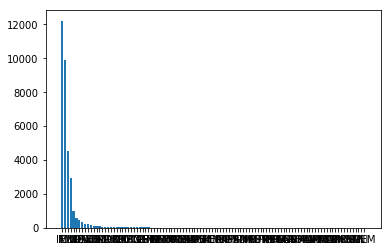

Bar graph of : Specialty Description


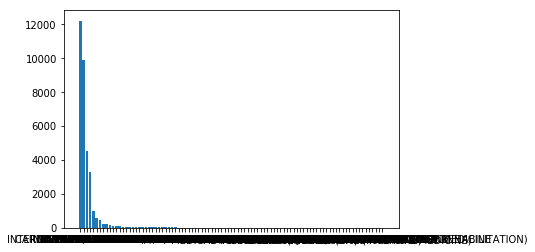

Bar graph of : State


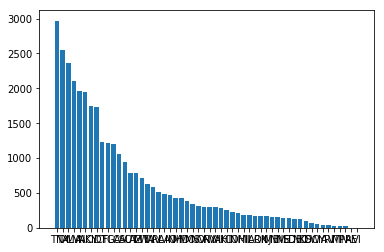

Histogram of : Call Attempts


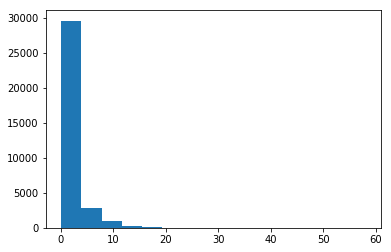

Histogram of : Calls Successfully Completed


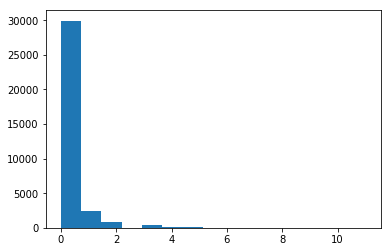

Histogram of : Emails Sent


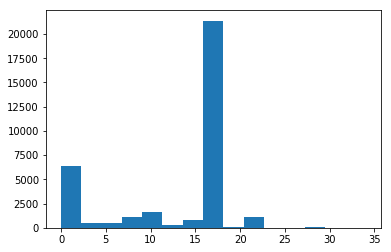

Histogram of : Emails Opened


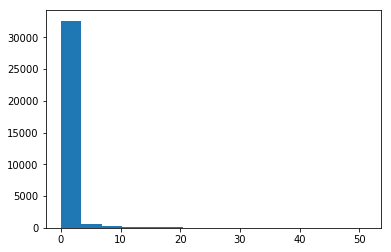

Histogram of : Faxes Sent


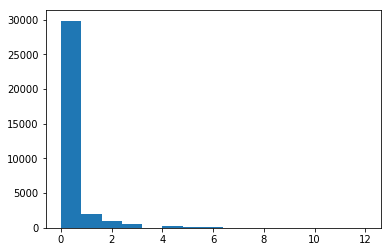

Histogram of : Brand 1 Sales (Company's Brand)


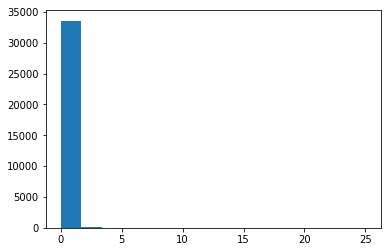

Histogram of : Brand 2 Sales (Competitor Brand)


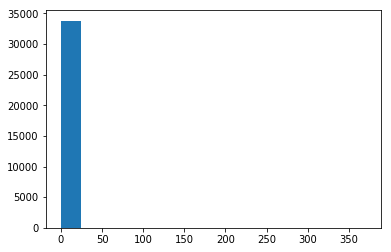

Histogram of : Total Branded Market Sales


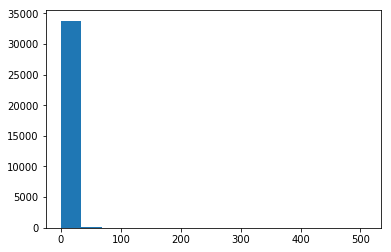

Histogram of : Total Market (Branded + Unbranded) Sales


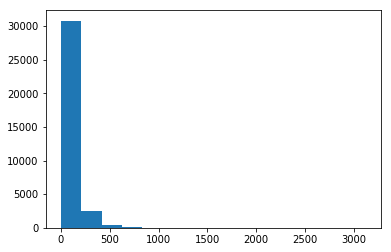

In [16]:
def plot_vars(df):
    for i in df.columns[1:]:
        if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
            print('Histogram of :',i)
            plt.hist(df[i],bins=15)
            plt.show()
        else:
            print('Bar graph of :',i)
            plt.bar(df[i].unique().tolist(),df[i].value_counts().tolist())
            plt.show()
            
plot_vars(data.dropna())

In [17]:
data['Brand 1 Sales (Company\'s Brand)'].unique()

array([ 0,  2,  3, 10,  1,  8,  5, 11,  4,  6, 14,  7,  9, 12, 13, 25, 16],
      dtype=int64)

<b>Pre-processing of the variables:</b>

In [18]:
def preprocessing_X(df):  
    
    X_ = pd.get_dummies(df)
    
#     X_ = df.copy()
    
    from sklearn.preprocessing import MinMaxScaler

    STS = MinMaxScaler()

    X_[X_.select_dtypes(['int64','float64']).columns.tolist()] = STS.fit_transform(X_[X_.select_dtypes(['int64','float64']).columns.tolist()])
    
    return X_

X = preprocessing_X(X)

C:\Users\nayak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<b>Model building:

In [19]:
def model_built(X1,y1, test_ratio):
    
    from sklearn.model_selection import train_test_split

    X_train,X_test,y_train,y_test = train_test_split(X1,y1,random_state=123,test_size=test_ratio)
      
    from sklearn.linear_model import LinearRegression

    linreg = LinearRegression().fit(X_train,y_train)
    
    return linreg, X_train, X_test, y_train, y_test

LR,X_train, X_test, y_train, y_test = model_built(X, y, 0.3)

<b>Predict!

In [20]:
y_lr_train = LR.predict(X_train)

y_lr_test = LR.predict(X_test)

<b>Model evaluation!

In [21]:
def metrics(X_train, X_test,y_tn, y_pred_tn, y_ts, y_pred_ts):

    from sklearn.metrics import r2_score
    
    r_train = r2_score(y_tn, y_pred_tn)
    
    r_test = r2_score(y_ts, y_pred_ts)
    
    print('R squared on train data :',r_train)
    print('R squared on test data :',r_test)
    
    print('Training MSE :',sum((y_pred_tn - y_tn)**2/len(y_tn))**0.5)
    print('Test MSE :',sum((y_pred_ts - y_ts)**2/len(y_ts))**0.5)

    
metrics(X_train, X_test, y_train, y_lr_train,y_test,y_lr_test)

R squared on train data : 0.013279987513329594
R squared on test data : 0.010873970706128389
Training MSE : 0.45537799332358414
Test MSE : 0.42894330262284314


Not a very good fit on the data!

We'll have to use other features now as we do not have enough features!

In [22]:
X = data.copy()

X.drop(columns = ['Brand 2 Sales (Competitor Brand)', 'Total Branded Market Sales','Total Market (Branded + Unbranded) Sales','Specialty Description'],inplace=True)

In [23]:
X = preprocessing_X(X)

C:\Users\nayak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [24]:
X.shape

(84080, 257)

<b>Checking the data now!

In 2d:

[0.42244228] 



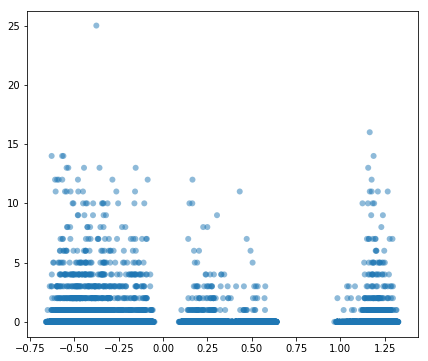

In [25]:
def pca_plot_2d_binaryclass(design_matrix,target):
    
    pca_plot = PCA(n_components=1).fit(design_matrix)
    print(pca_plot.explained_variance_,'\n')
    pcs = pca_plot.transform(design_matrix)

    plt.figure(figsize=(7,6))
    plt.scatter(pcs, y, edgecolor='', alpha=0.5)
    plt.show()
    
pca_plot_2d_binaryclass(X,y)

In 3d:

[0.42244228 0.30818476] 



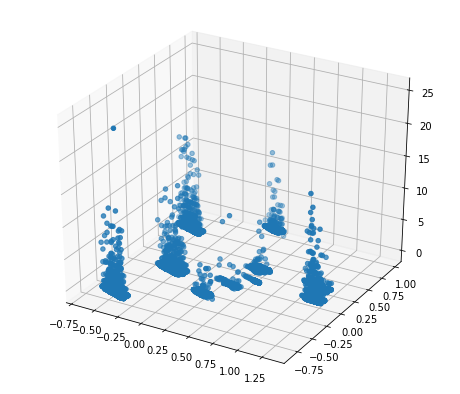

In [26]:
def pca_plot_3d_binaryclass(design_matrix,target):
    
    pca_plot = PCA(n_components=2).fit(design_matrix)
    print(pca_plot.explained_variance_,'\n')
    pcs = pca_plot.transform(design_matrix)

    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111, projection='3d')
    xs = pcs[:,0] 
    ys = pcs[:,1]
    zs = y
    ax.scatter(xs,ys,zs, marker = 'o')
    plt.show()
    
pca_plot_3d_binaryclass(X,y)

<b>Model Building

In [27]:
LR2,X_train, X_test, y_train, y_test = model_built(X, y, 0.3)

In [28]:
y2_lr_train = LR2.predict(X_train)

y2_lr_test = LR2.predict(X_test)

In [29]:
metrics(X_train, X_test, y_train, y2_lr_train,y_test,y2_lr_test)

R squared on train data : 1.0
R squared on test data : 0.9999999720152001
Training MSE : 4.411528114546857e-15
Test MSE : 7.214980791008275e-05


The model seems to have overfitted on train as well as test data, let us see if Ridge helps with the overfitting!

<b>RIDGE</b>

In [30]:
def Ridge(X1,y1,test_ratio): 

    from sklearn.model_selection import train_test_split
    
    from sklearn.linear_model import Ridge

    X_train,X_test,y_train,y_test = train_test_split(X1,y1,random_state=123,test_size=test_ratio)

    Rg = Ridge(alpha=0.4, normalize=True).fit(X1, y1)

    y_r_train = Rg.predict(X_train)
    
    y_r_test = Rg.predict(X_test)
    
    return Rg,X_train, X_test, y_train, y_test, y_r_train,y_r_test

Rdge,X_rg_train,X_rg_test, y_rg_train, y_rg_test, ypred_rg_train, ypred_rg_test = Ridge(X,y,0.3)

In [31]:
metrics(X_rg_train,X_rg_test, y_rg_train, ypred_rg_train, y_rg_test, ypred_rg_test)

R squared on train data : 0.9181653534299011
R squared on test data : 0.9181532746491667
Training MSE : 0.1311425657669929
Test MSE : 0.12338851289272085


It is better than non-regularized linear regression.

<b>Analyzing the results!</b>

In [32]:
import statsmodels.api as sm

X_ = sm.add_constant(X)

est = sm.OLS(y_train,X_train).fit()

In [33]:
pval = est.summary2().tables[1]

In [34]:
pval.iloc[1:6].sort_values(by=['P>|t|'], ascending=False)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Calls Successfully Completed,1.304512e-15,6.420960e-16,2.031646,4.219396e-02,4.600103e-17,2.563023e-15
Faxes Sent,1.651457e-15,6.371876e-16,2.591790,9.550158e-03,4.025662e-16,2.900347e-15
Emails Opened,4.305584e-15,6.041319e-16,7.126894,1.038389e-12,3.121483e-15,5.489685e-15
Emails Sent,1.897354e-15,1.031424e-16,18.395476,2.329496e-75,1.695194e-15,2.099513e-15
Call Attempts,-1.920339e-14,8.313548e-16,-23.098909,1.594477e-117,-2.083285e-14,-1.757393e-14


<b>Amongst the channels used for sales prediction</b>

The P-vales being less than 0.01 says that these variables contribute a lot to the Sales Prediction as the null-hypothesis is rejected (H0 : theta = 0). More we complete the calls successfully more sales we might bring in.

Next factor that plays an important role in sales prediction is number of faxes sent.

Emails opened is the 3rd important factor for predicting sales amongst these 5.

Emails sent and calls attempted are the last factors that affect the sales prediction.

### FIN